In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings

#sns.set_style("whitegrid", {"grid.color":"k","grid.linewidth":"2", "grid.linestyle": ":"})
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Final_Data_set.csv")
df.dtypes
df=df.drop(['temp',"EDA"],axis=1)
df.dtypes

Unnamed: 0      int64
ax            float64
ay            float64
az            float64
SpO2          float64
hr            float64
class          object
age             int64
Gender         object
heigth          int64
weigth          int64
dtype: object

In [3]:
df=df.iloc[:,1:]
df.mean()

ax          0.456301
ay         -0.735039
az         -0.184105
SpO2       95.896624
hr         79.591385
age        27.899632
heigth    170.111067
weigth     69.108393
dtype: float64

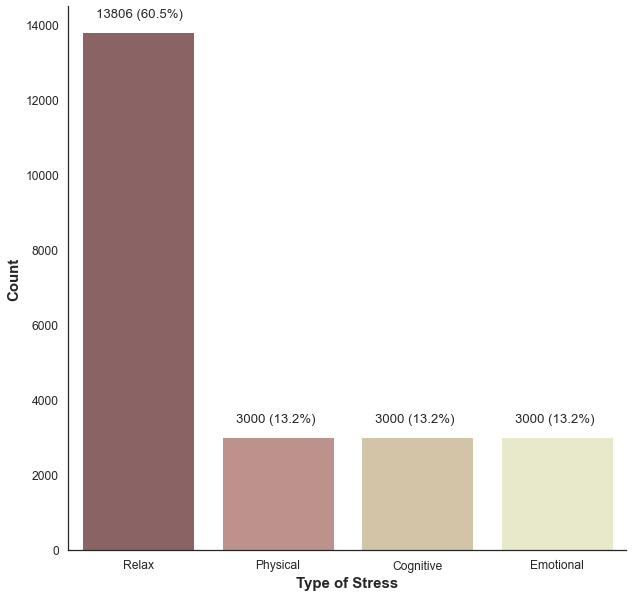

In [4]:
sns.set(style='white',font_scale=1.1)
fig = plt.figure(figsize=(10,10))
ax = sns.countplot(data=df,x='class',palette='pink')
ax.set_xticklabels(['Relax','Physical','Cognitive',"Emotional"])
for p in ax.patches:
        ax.annotate(str(p.get_height())+' ('+str((p.get_height()/len(df)*100).round(1))+'%)', (p.get_x()+0.1, p.get_height()+400))
plt.xlabel('Type of Stress',weight='bold',fontsize='15')
plt.ylabel('Count',weight='bold',fontsize='15') 
sns.despine()


In [5]:
#df["class"].unique().sum()

In [5]:
min(df["az"])

-1.78997101

In [6]:
max(df["az"])

2.14997909

In [6]:
"""df["A"]=abs((df["ax"])+(df["ay"])+(df["az"]))
#d=pd.DataFrame({"Rest": df[df["class"]=="Rest"].A.mean(),"Physical": df[df["class"]=="Physical"].A.mean()
 #               ,"Cognitive": df[df["class"]=="Cognitive"].A.mean(),"Emotional": df[df["class"]=="Emotional"].A.mean()},index={"mean"})
"""


'df["A"]=abs((df["ax"])+(df["ay"])+(df["az"]))\n#d=pd.DataFrame({"Rest": df[df["class"]=="Rest"].A.mean(),"Physical": df[df["class"]=="Physical"].A.mean()\n #               ,"Cognitive": df[df["class"]=="Cognitive"].A.mean(),"Emotional": df[df["class"]=="Emotional"].A.mean()},index={"mean"})\n'

In [7]:
"""classes = ['Physical','Cognitive',"Emotional",'Rest']
plt.figure(figsize=(15,7.5))
for C in classes:
    subset = df[df['class'] == C]
    sns.distplot((subset['ax']), hist = False, kde = True,
                 kde_kws = {'shade': True,'linewidth': 5,'bw_adjust':2},
                 label = C)
plt.legend()
#plt.xticks(range(-2,2,1))
plt.xlabel("X",size=20)
plt.ylabel("Density",size=20)
plt.grid()
"""

'classes = [\'Physical\',\'Cognitive\',"Emotional",\'Rest\']\nplt.figure(figsize=(15,7.5))\nfor C in classes:\n    subset = df[df[\'class\'] == C]\n    sns.distplot((subset[\'ax\']), hist = False, kde = True,\n                 kde_kws = {\'shade\': True,\'linewidth\': 5,\'bw_adjust\':2},\n                 label = C)\nplt.legend()\n#plt.xticks(range(-2,2,1))\nplt.xlabel("X",size=20)\nplt.ylabel("Density",size=20)\nplt.grid()\n'

In [8]:
"""
classes = ['Physical','Cognitive',"Emotional",'Rest']
plt.figure(figsize=(15,7.5))
for C in classes:
    subset = df[df['class'] == C]
    sns.distplot((subset['ay']), hist = False, kde = True,
                 kde_kws = {'shade': True,'linewidth': 5,'bw_adjust':2},
                 label = C)
plt.legend()
#plt.xticks(range(-2,2,1))
plt.xlabel("Y",size=20)
plt.ylabel("Density",size=20)
plt.grid()
"""

'\nclasses = [\'Physical\',\'Cognitive\',"Emotional",\'Rest\']\nplt.figure(figsize=(15,7.5))\nfor C in classes:\n    subset = df[df[\'class\'] == C]\n    sns.distplot((subset[\'ay\']), hist = False, kde = True,\n                 kde_kws = {\'shade\': True,\'linewidth\': 5,\'bw_adjust\':2},\n                 label = C)\nplt.legend()\n#plt.xticks(range(-2,2,1))\nplt.xlabel("Y",size=20)\nplt.ylabel("Density",size=20)\nplt.grid()\n'

In [9]:
"""classes = ['Physical','Cognitive',"Emotional",'Rest']
plt.figure(figsize=(15,7.5))
for C in classes:
    subset = df[df['class'] == C]
    sns.distplot((subset['az']), hist = False, kde = True,
                 kde_kws = {'shade': True,'linewidth': 5,'bw_adjust':2},
                 label = C)
plt.legend()
#plt.xticks(range(-2,2,1))
plt.xlabel("Z",size=20)
plt.ylabel("Density",size=20)
plt.grid()
"""

'classes = [\'Physical\',\'Cognitive\',"Emotional",\'Rest\']\nplt.figure(figsize=(15,7.5))\nfor C in classes:\n    subset = df[df[\'class\'] == C]\n    sns.distplot((subset[\'az\']), hist = False, kde = True,\n                 kde_kws = {\'shade\': True,\'linewidth\': 5,\'bw_adjust\':2},\n                 label = C)\nplt.legend()\n#plt.xticks(range(-2,2,1))\nplt.xlabel("Z",size=20)\nplt.ylabel("Density",size=20)\nplt.grid()\n'

In [10]:
#df=df.drop("A",axis=1)

In [11]:
"""classes = ['Physical','Cognitive',"Emotional",'Rest']
plt.figure(figsize=(15,7.5))
for C in classes:
    subset = df[df['class'] == C]
    sns.distplot(subset[subset["Gender"]=="M"].hr, hist = False, kde = True,
                 kde_kws = {'shade': True,'linewidth': 5,'bw_adjust':2},
                 label = C,)
plt.legend()
plt.grid()
plt.xlabel("Heart Rate_Male",size=20)
plt.ylabel("Density",size=20)
plt.ylim([0,0.05])
plt.xlim([30,160])
"""

'classes = [\'Physical\',\'Cognitive\',"Emotional",\'Rest\']\nplt.figure(figsize=(15,7.5))\nfor C in classes:\n    subset = df[df[\'class\'] == C]\n    sns.distplot(subset[subset["Gender"]=="M"].hr, hist = False, kde = True,\n                 kde_kws = {\'shade\': True,\'linewidth\': 5,\'bw_adjust\':2},\n                 label = C,)\nplt.legend()\nplt.grid()\nplt.xlabel("Heart Rate_Male",size=20)\nplt.ylabel("Density",size=20)\nplt.ylim([0,0.05])\nplt.xlim([30,160])\n'

In [12]:
"""classes = ['Physical','Cognitive',"Emotional",'Rest']
plt.figure(figsize=(15,7.5))
for C in classes:
    subset = df[df['class'] == C]
    sns.distplot(subset[subset["Gender"]=="F"].hr, hist = False, kde = True,
                 kde_kws = {'shade':  True,'linewidth': 5,'bw_adjust':3},
                 label = C)
plt.legend()
plt.grid()
plt.xlabel("Heart Rate_Female",size=20)
plt.ylabel("Density",size=20)
plt.ylim([0,0.05])
plt.xlim([30,160])
"""

'classes = [\'Physical\',\'Cognitive\',"Emotional",\'Rest\']\nplt.figure(figsize=(15,7.5))\nfor C in classes:\n    subset = df[df[\'class\'] == C]\n    sns.distplot(subset[subset["Gender"]=="F"].hr, hist = False, kde = True,\n                 kde_kws = {\'shade\':  True,\'linewidth\': 5,\'bw_adjust\':3},\n                 label = C)\nplt.legend()\nplt.grid()\nplt.xlabel("Heart Rate_Female",size=20)\nplt.ylabel("Density",size=20)\nplt.ylim([0,0.05])\nplt.xlim([30,160])\n'

96.35560910379677,11.906398209584767
82.44922307521388,12.359859409245484
75.12795147630122,10.890745922360193
76.29746249961572,11.739027434729223


(30.0, 160.0)

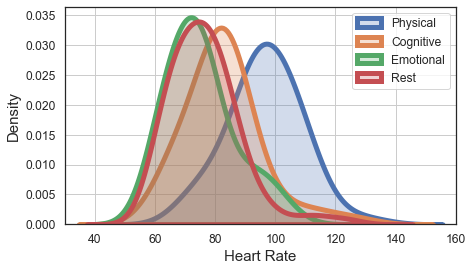

In [26]:
classes = ['Physical','Cognitive',"Emotional",'Rest']
plt.figure(figsize=(7,4))
for C in classes:
    subset = df[df['class'] == C]
    sns.distplot(subset["hr"], hist = False, kde = True,
                 kde_kws = {'shade':  True,'linewidth': 5,'bw_adjust':3},
                 label = C)
    print(str(np.mean(subset["hr"])) + "," +str(np.std(subset["hr"])))
    #plt.axvline(x=np.mean(subset["hr"]))
plt.legend()
plt.grid()
plt.xlabel("Heart Rate",size=15)
plt.ylabel("Density",size=15)
#plt.ylim([0,0.05])
plt.xlim([30,160])

95.52531619715093,2.04871109572662
96.569297620679,1.630296335183284
95.71697726301896,1.5940166396415782
95.87017434649889,1.3819639828016674


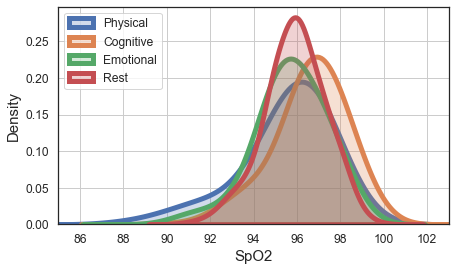

In [27]:
classes = ['Physical','Cognitive',"Emotional",'Rest']
plt.figure(figsize=(7,4))

for C in classes:
    subset = df[df['class'] == C]
    sns.distplot(subset["SpO2"], hist = False, kde = True,
                 kde_kws = {'shade':  True,'linewidth': 5,'bw_adjust':3},
                 label = C)
    print(str(np.mean(subset["SpO2"])) + "," +str(np.std(subset["SpO2"])))
plt.legend(loc='upper left')
plt.xlabel("SpO2",size=15)
plt.ylabel("Density",size=15)
plt.xlim([85,103])
plt.grid()

95.52531619715093,2.04871109572662
96.569297620679,1.630296335183284
95.71697726301896,1.5940166396415782
95.87017434649889,1.3819639828016674


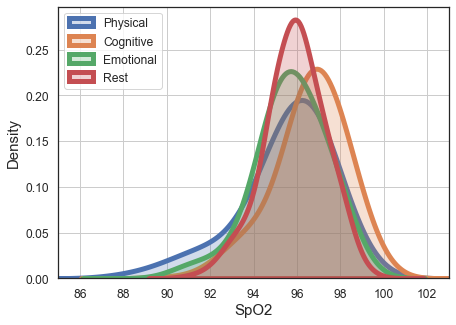

In [17]:
classes = ['Physical','Cognitive',"Emotional",'Rest']
plt.figure(figsize=(7,5))

for C in classes:
    subset = df[df['class'] == C]
    sns.distplot(subset["SpO2"], hist = False, kde = True,
                 kde_kws = {'shade':  True,'linewidth': 5,'bw_adjust':3},
                 label = C)
    print(str(np.mean(subset["SpO2"])) + "," +str(np.std(subset["SpO2"])))
plt.legend(loc='upper left')
plt.xlabel("SpO2",size=15)
plt.ylabel("Density",size=15)
plt.xlim([85,103])
plt.grid()

In [18]:
M=df[df['Gender']=="M"]
M=pd.DataFrame({'Rest':M[M['class']== "Rest"].hr.describe(),'Physical':M[M['class']== "Physical"].hr.describe(),
                'Emotional':M[M['class']== "Emotional"].hr.describe(),'Cognitive':M[M['class']== "Cognitive"].hr.describe()})
M=M.iloc[1:3,:]
M=M.transpose()
#M.columns={"M_mean","M_std"}
M
F=df[df['Gender']=="F"]
F=pd.DataFrame({'Rest':F[F['class']== "Rest"].hr.describe(),'Physical':F[F['class']== "Physical"].hr.describe(),
                'Emotional':F[F['class']== "Emotional"].hr.describe(),'Cognitive':F[F['class']== "Cognitive"].hr.describe()})
F=F.iloc[1:3,:]
F=F.transpose()
#F.columns={"F_std","F_mean"} 
F

d=M.copy()
d["F_mean"]=F['mean']
d["F_std"]=F['std']
d=pd.DataFrame({'M_mean':M["mean"],'F_mean':F["mean"],"M_Std":M["std"],"F_std":F["std"]})
d

,M_mean,F_mean,M_Std,F_std
Rest,80.154488,72.420270,11.126960,11.041835
Physical,96.183944,96.527274,8.721753,14.407839
Emotional,79.073015,71.182888,10.412882,9.889338
Cognitive,88.682237,76.216209,12.041134,9.110127


# Encoding

In [5]:
df["class"]=pd.factorize(df['class'])[0]
df["Gender"]=pd.factorize(df['Gender'])[0]
df.head(3)

df.head()

,ax,ay,az,SpO2,hr,class,age,Gender,heigth,weigth
0,0.760015,-0.869990,-0.100004,96.999969,89.000763,0,30,0,177,94
1,0.750005,-0.869990,-0.110031,96.999969,88.000137,0,30,0,177,94
2,0.750005,-0.869990,-0.110031,96.999969,87.000443,0,30,0,177,94
3,0.750005,-0.879993,-0.100004,96.999969,87.000443,0,30,0,177,94
4,0.760015,-0.859987,-0.100004,96.999969,87.000443,0,30,0,177,94


# Correlation

Text(0.5, 1.0, 'Pearson correlation')

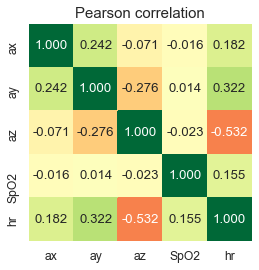

In [21]:
corr_matrix = df.copy()
corr_matrix=corr_matrix.drop(["class","heigth","weigth","age","Gender"],axis=1)
for col in corr_matrix.columns:
    if corr_matrix[col].dtype == "O":
         corr_matrix[col] = corr_matrix[col].factorize(sort=True)[0]
corr_matrix = corr_matrix.corr(method="pearson")
plt.figure(figsize=(4,4))
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.3f', cmap="RdYlGn",cbar=False, linewidths=0)#cmap="RdYlGn"
plt.title("Pearson correlation",size= 15)

# Feature importance

In [6]:
df_1=df.copy()
df_1["BMI"] = (df_1["weigth"]/(df_1["heigth"])**2)*10000 # 11th feature   

In [7]:
X = df_1.drop('class', axis=1)
X = X.drop(["heigth","weigth"],axis=1)
y = df_1['class']

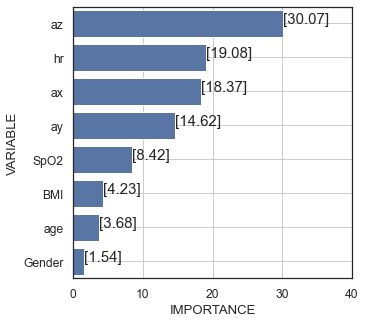

In [8]:
feature_names = X.columns.tolist()

## Importance
model = ensemble.RandomForestClassifier(random_state=1)
model.fit(X,y)
importances = model.feature_importances_

## Put in a pandas dtf
dtf_importances = pd.DataFrame({"IMPORTANCE":importances, "VARIABLE":feature_names})
dtf_importances = dtf_importances.set_index("VARIABLE")
dtf_importances=dtf_importances.sort_values('IMPORTANCE',ascending=False)
#plt.figure(figsize=(20,10))
plt.figure(figsize=(5,5))
plt.xlim(0,40)
#sns.lineplot(y= dtf_importances.index,x='IMPORTANCE',data=dtf_importances*100,color="k")
s=sns.barplot(y= dtf_importances.index,x='IMPORTANCE',data=dtf_importances*100,color="b")
g=np.round(dtf_importances.values*100,2)
plt.grid()
for index, value in enumerate(g):
    plt.text(value, index, str(value),size= 15)
              #dtf_importances.sort_values('IMPORTANCE',ascending = False))

In [9]:
dtf_importances*100 

,IMPORTANCE
VARIABLE,
az,30.067587
hr,19.080345
ax,18.366642
ay,14.621228
SpO2,8.424438
BMI,4.225028
age,3.676056
Gender,1.538676


# Scaling

In [10]:
#from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#pca = PCA(n_components=10)
#X = pca.fit_transform(X)
#X_test = pca.transform(X_test)

sc = StandardScaler()
X = sc.fit_transform(X)
#X_test = sc.transform(X_test)
X

array([[ 0.61157055, -0.5167547 ,  0.23037945, ...,  0.51140502,
        -0.99842271,  1.18745409],
       [ 0.59141359, -0.5167547 ,  0.20291417, ...,  0.51140502,
        -0.99842271,  1.18745409],
       [ 0.59141359, -0.5167547 ,  0.20291417, ...,  0.51140502,
        -0.99842271,  1.18745409],
       ...,
       [-1.48262609, -0.63166946,  1.07958573, ..., -2.16691344,
         1.00157978, -0.85575452],
       [-1.48262609, -0.63166946,  1.07958573, ..., -2.16691344,
         1.00157978, -0.85575452],
       [-1.48262609, -0.63166946,  1.07958573, ..., -2.16691344,
         1.00157978, -0.85575452]])

# Train_Test_Splitting

In [13]:
## Train_Test_Splitting 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.20,random_state=1)
print("X_train shape:", X_train.shape, "| X_test shape:", X_test.shape)
print("y_train mean:", round(np.mean(y_train),2), "| y_test mean:", round(np.mean(y_test),2))
print(X.shape[1], "features:")

X_train shape: (18244, 8) | X_test shape: (4562, 8)
y_train mean: 0.79 | y_test mean: 0.78
8 features:


In [24]:
X_train

array([[-1.03956632, -1.01452762, -0.34494034, ...,  1.24185552,
         1.00157978,  2.45722646],
       [-0.27452749, -0.09554776, -1.79668336, ...,  0.51140502,
        -0.99842271,  0.16346271],
       [-0.47575953,  0.97645252, -2.20754884, ..., -2.16691344,
         1.00157978, -0.85575452],
       ...,
       [-0.49598532,  0.28739103, -2.15272114, ...,  0.51140502,
        -0.99842271,  0.16346271],
       [ 0.43033479, -0.7083985 ,  0.28509095, ..., -0.70601246,
        -0.99842271, -0.43164187],
       [-0.4959374 , -1.16773974,  0.20291417, ...,  0.51140502,
        -0.99842271,  1.18745409]])

In [25]:
## Model
model = LogisticRegression(C=100)
model.fit(X_train, y_train)

LogisticRegression(C=100)

In [26]:
y_pred = model.predict(X_test)
y_ptrain= model.predict(X_train) 

cm = confusion_matrix(y_test,y_pred)
accuracy = float(cm.diagonal().sum())/len(y_test)
print("\nAccuracy Of  test : ", accuracy)
cm = confusion_matrix(y_train,y_ptrain)
accuracy = float(cm.diagonal().sum())/len(y_train)
print("\nAccuracy Of  train : ", accuracy)
print(classification_report(y_test, y_pred, labels=[0,1, 2,3]))


Accuracy Of  test :  0.7124068391056554

Accuracy Of  train :  0.713659285244464
              precision    recall  f1-score   support

           0       0.70      0.96      0.81      2789
           1       0.83      0.88      0.85       571
           2       0.51      0.10      0.17       619
           3       0.00      0.00      0.00       583

    accuracy                           0.71      4562
   macro avg       0.51      0.49      0.46      4562
weighted avg       0.60      0.71      0.63      4562



In [27]:
## Model
ldam=LinearDiscriminantAnalysis()
model=ldam.fit(X_train, y_train)

In [28]:
y_pred = model.predict(X_test)
y_ptrain= model.predict(X_train) 

cm = confusion_matrix(y_test,y_pred)
accuracy = float(cm.diagonal().sum())/len(y_test)
print("\nAccuracy Of  test : ", accuracy)
cm = confusion_matrix(y_train,y_ptrain)
accuracy = float(cm.diagonal().sum())/len(y_train)
print("\nAccuracy Of  train : ", accuracy)
print(classification_report(y_test, y_pred, labels=[0,1, 2,3]))


Accuracy Of  test :  0.7099956159579132

Accuracy Of  train :  0.7088905941679456
              precision    recall  f1-score   support

           0       0.70      0.96      0.81      2789
           1       0.83      0.85      0.84       571
           2       0.50      0.12      0.19       619
           3       0.00      0.00      0.00       583

    accuracy                           0.71      4562
   macro avg       0.51      0.48      0.46      4562
weighted avg       0.60      0.71      0.63      4562



In [29]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

GaussianNB()

In [30]:
y_pred = gnb.predict(X_test)
y_ptrain= gnb.predict(X_train) 

cm = confusion_matrix(y_test,y_pred)
accuracy = float(cm.diagonal().sum())/len(y_test)
print("\nAccuracy Of  test : ", accuracy)
cm = confusion_matrix(y_train,y_ptrain)
accuracy = float(cm.diagonal().sum())/len(y_train)
print("\nAccuracy Of  train : ", accuracy)
print(classification_report(y_test, y_pred, labels=[0,1, 2,3]))


Accuracy Of  test :  0.7115300306882946

Accuracy Of  train :  0.7097127822845867
              precision    recall  f1-score   support

           0       0.72      0.94      0.81      2789
           1       0.77      0.93      0.84       571
           2       0.44      0.11      0.18       619
           3       0.37      0.06      0.10       583

    accuracy                           0.71      4562
   macro avg       0.58      0.51      0.48      4562
weighted avg       0.64      0.71      0.64      4562



In [31]:
## SVM Gauss
svclassifier = SVC(kernel='rbf',random_state=1)
model=svclassifier.fit(X_train, y_train)

In [32]:
y_pred = model.predict(X_test)
y_ptrain= model.predict(X_train) 

cm = confusion_matrix(y_test,y_pred)
accuracy = float(cm.diagonal().sum())/len(y_test)
print("\nAccuracy Of  test : ", accuracy)
cm = confusion_matrix(y_train,y_ptrain)
accuracy = float(cm.diagonal().sum())/len(y_train)
print("\nAccuracy Of  train : ", accuracy)
print(classification_report(y_test, y_pred, labels=[0,1, 2,3]))


Accuracy Of  test :  0.8185006576063131

Accuracy Of  train :  0.827943433457575
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      2789
           1       0.91      0.96      0.94       571
           2       0.81      0.59      0.68       619
           3       0.80      0.25      0.38       583

    accuracy                           0.82      4562
   macro avg       0.83      0.69      0.72      4562
weighted avg       0.82      0.82      0.79      4562



In [33]:
## Decision Tree
DTClassifier= DecisionTreeClassifier(criterion='gini', random_state=0)
model=DTClassifier.fit(X_train,y_train)

In [34]:
y_pred = model.predict(X_test)
y_ptrain= model.predict(X_train) 
cm = confusion_matrix(y_test,y_pred)
accuracy = float(cm.diagonal().sum())/len(y_test)
print("\nAccuracy Of  test : ", accuracy)
cm = confusion_matrix(y_train,y_ptrain)
accuracy = float(cm.diagonal().sum())/len(y_train)
print("\nAccuracy Of  train : ", accuracy)
print("\n")
print(classification_report(y_test, y_pred, labels=[0,1, 2,3]))


Accuracy Of  test :  0.9219640508548882

Accuracy Of  train :  0.9833918000438501


              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2789
           1       0.94      0.95      0.94       571
           2       0.88      0.83      0.86       619
           3       0.87      0.83      0.85       583

    accuracy                           0.92      4562
   macro avg       0.91      0.89      0.90      4562
weighted avg       0.92      0.92      0.92      4562



In [35]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 60, 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
               
             
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 22, 35, 47, 60, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [36]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring="accuracy",
                               n_iter = 100, cv = 3, verbose=4, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 22, 35, 47, 60, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=42, scoring='accuracy', verbose=4)

In [37]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 35}

In [36]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring="accuracy",
                               n_iter = 100, cv = 3, verbose=4, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 22, 35, 47, 60, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=42, scoring='accuracy', verbose=4)

In [11]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 60, 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
               
             
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 22, 35, 47, 60, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [17]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring="accuracy",
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 22, 35, 47, 60, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=42, scoring='accuracy', verbose=2)

In [18]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 22}

In [38]:
model=rf_random

In [39]:
y_pred = model.predict(X_test)
y_ptrain= model.predict(X_train) 
cm = confusion_matrix(y_test,y_pred)
accuracy = float(cm.diagonal().sum())/len(y_test)
print("\nAccuracy Of  test : ", accuracy)
cm = confusion_matrix(y_train,y_ptrain)
accuracy = float(cm.diagonal().sum())/len(y_train)
print("\nAccuracy Of  train : ", accuracy)
print("\n")
print(classification_report(y_test, y_pred, labels=[0,1, 2,3]))


Accuracy Of  test :  0.943445857080228

Accuracy Of  train :  0.9833918000438501


              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2789
           1       0.95      0.98      0.96       571
           2       0.93      0.84      0.89       619
           3       0.91      0.89      0.90       583

    accuracy                           0.94      4562
   macro avg       0.94      0.92      0.93      4562
weighted avg       0.94      0.94      0.94      4562



In [40]:

model = XGBClassifier()
model.fit(X_train, y_train)

[09:32:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [41]:
y_pred = model.predict(X_test)
y_ptrain= model.predict(X_train) 
cm = confusion_matrix(y_test,y_pred)
accuracy = float(cm.diagonal().sum())/len(y_test)
print("\nAccuracy Of  test : ", accuracy)
cm = confusion_matrix(y_train,y_ptrain)
accuracy = float(cm.diagonal().sum())/len(y_train)
print("\nAccuracy Of  train : ", accuracy)
print("\n")
print(classification_report(y_test, y_pred, labels=[0,1, 2,3]))


Accuracy Of  test :  0.9392810170977641

Accuracy Of  train :  0.9707849155886867


              precision    recall  f1-score   support

           0       0.94      0.97      0.96      2789
           1       0.97      0.98      0.97       571
           2       0.94      0.82      0.88       619
           3       0.91      0.85      0.88       583

    accuracy                           0.94      4562
   macro avg       0.94      0.91      0.92      4562
weighted avg       0.94      0.94      0.94      4562



In [42]:
## K - Neighbors

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 30)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))


In [43]:
test_accuracy

[0.9351161771153003,
 0.922840859272249,
 0.9276633055677335,
 0.9241560718982902,
 0.9210872424375274,
 0.9171416045594037,
 0.9136343708899606,
 0.9110039456378781,
 0.9099079351161771,
 0.9088119245944761,
 0.9081543182814555,
 0.9057430951337133,
 0.9035510740903112,
 0.9015782551512495,
 0.8991670320035072,
 0.8982902235861464,
 0.8974134151687856,
 0.8914949583516002,
 0.8914949583516002,
 0.89127575624726,
 0.8906181499342394,
 0.8893029373081982,
 0.8871109162647961,
 0.8877685225778168,
 0.8849188952213941,
 0.8846996931170539,
 0.8842612889083735,
 0.8827268741779921,
 0.8790004384042087]

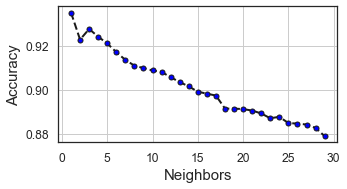

In [44]:
plt.figure(figsize=(5,2.5))
#plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy,color='k', linestyle='dashed', marker='o',linewidth = 2,
         markerfacecolor='blue', markersize=5)
plt.ylabel("Accuracy",size=15)
plt.xlabel("Neighbors",size=15)
plt.grid()

In [45]:
model=KNeighborsClassifier(n_neighbors=1)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [46]:
y_pred = model.predict(X_test)
y_ptrain= model.predict(X_train) 
cm = confusion_matrix(y_test,y_pred)
accuracy = float(cm.diagonal().sum())/len(y_test)
print("\nAccuracy Of  test : ", accuracy)
cm = confusion_matrix(y_train,y_ptrain)
accuracy = float(cm.diagonal().sum())/len(y_train)
print("\nAccuracy Of  train : ", accuracy)
print("\n")
print(classification_report(y_test, y_pred, labels=[0,1, 2,3]))


Accuracy Of  test :  0.9351161771153003

Accuracy Of  train :  0.979883797412848


              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2789
           1       0.95      0.97      0.96       571
           2       0.92      0.86      0.89       619
           3       0.88      0.87      0.87       583

    accuracy                           0.94      4562
   macro avg       0.92      0.91      0.92      4562
weighted avg       0.93      0.94      0.93      4562

